In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mistune.plugins.formatting import insert

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
import causalml

In [4]:
import numpy as np

In [5]:
np.version.version

'1.26.4'

In [6]:
bd = pd.read_csv('train.csv')

In [12]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
bd["cc_4_OrdinalEncoder"] = ord_enc.fit_transform(bd[["cc_4"]])

In [15]:
ord_enc = OrdinalEncoder()
bd["cc_2_OrdinalEncoder"] = ord_enc.fit_transform(bd[["cc_2"]])

In [16]:
ord_enc = OrdinalEncoder()
bd["cc_6_OrdinalEncoder"] = ord_enc.fit_transform(bd[["cc_6"]])

In [17]:
bd['retro_date'] = pd.to_datetime(bd['retro_date'])

In [18]:
df = bd.drop(['cc_2', 'cc_4', 'cc_6'], axis=1)

In [19]:
test = pd.read_csv('test.csv')

In [20]:
X_train = df.drop(columns = 'successful_utilization', axis=1)
y_train = df.successful_utilization
X_test = test

In [22]:
X_train.drop('retro_date', axis=1, inplace=True)

In [23]:
RANDOM_STATE = 52
model = LogisticRegression(random_state=RANDOM_STATE)

In [25]:
correlation_matrix = X_train.corr()
correlation_matrix

,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,feature_2,cc_7,cc_8,application_2,...,application_15,feature_25,feature_26,cc_22,partner_24,application_16,treatment,cc_4_OrdinalEncoder,cc_2_OrdinalEncoder,cc_6_OrdinalEncoder
application_1,1.000000,NaN,-0.085946,-0.074087,-0.012511,0.045690,0.133267,0.001473,0.007822,0.339969,...,0.217071,-0.111691,0.012484,0.009987,-0.000694,0.188674,0.008458,-0.107882,-0.048283,0.008365
cc_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_3,-0.085946,NaN,1.000000,0.637948,-0.055992,-0.018049,-0.306510,-0.234674,-0.243692,-0.225124,...,-0.249527,0.761293,-0.409335,-0.180229,0.060297,-0.240049,-0.015693,0.543210,0.600171,0.127347
feature_1,-0.074087,NaN,0.637948,1.000000,-0.049452,-0.007789,-0.255944,-0.199380,-0.199201,-0.188897,...,-0.200493,0.678552,-0.383830,-0.150677,0.054840,-0.193847,-0.017538,0.508940,0.563982,0.114666
mb_1,-0.012511,NaN,-0.055992,-0.049452,1.000000,0.086544,-0.059637,-0.038980,-0.042224,-0.062307,...,-0.026958,-0.043738,0.155343,0.112228,-0.049323,-0.025939,0.003921,-0.110130,-0.137592,-0.002819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
application_16,0.188674,NaN,-0.240049,-0.193847,-0.025939,0.052945,0.479471,-0.013177,0.060448,0.471702,...,0.856395,-0.315428,0.016797,0.029020,0.030935,1.000000,0.006024,-0.288120,-0.082565,0.008443
treatment,0.008458,NaN,-0.015693,-0.017538,0.003921,-0.000600,0.006894,0.005775,0.004577,0.007182,...,0.007295,-0.020564,0.012476,0.005513,0.001316,0.006024,1.000000,-0.013090,-0.013297,-0.004411
cc_4_OrdinalEncoder,-0.107882,NaN,0.543210,0.508940,-0.110130,-0.038312,-0.387245,-0.136609,-0.171078,-0.291606,...,-0.308369,0.538577,-0.383643,-0.125704,0.023048,-0.288120,-0.013090,1.000000,0.506727,0.126966
cc_2_OrdinalEncoder,-0.048283,NaN,0.600171,0.563982,-0.137592,-0.002467,-0.000991,-0.158750,-0.180654,-0.047142,...,-0.076857,0.605617,-0.514451,-0.198690,0.080696,-0.082565,-0.013297,0.506727,1.000000,0.045741


In [76]:
import scipy.stats as stats

In [80]:
res = 0
for i in X_train.columns:
    for j in X_train.columns:
        r, p_value = stats.pearsonr(X_train[i], X_train[j])
        alpha = 0.05
        if p_value < alpha and i != j and abs(r) >= 0.3:
            print(i, "     ", j, "     ", r, "     ", p_value)
            res += 1
print(res)

/Users/ssd/Documents/src/spb2024/allcup/venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


application_1       application_2       0.34572033617241044       0.0
cc_3       feature_1       0.6529797740823735       0.0
cc_3       cc_10       -0.5485000748684367       0.0
cc_3       feature_9       0.7709246689256712       0.0
cc_3       feature_13       -0.6220538890235973       0.0
cc_3       cc_13       -0.30596437801287696       0.0
cc_3       cc_15       -0.6502092468809522       0.0
cc_3       feature_17       0.722687373171091       0.0
cc_3       cc_18       -0.5485057897002592       0.0
cc_3       feature_23       0.45467394013988977       0.0
cc_3       feature_25       0.7709246689256712       0.0
cc_3       feature_26       -0.42530754881209265       0.0
cc_3       cc_4_OrdinalEncoder       0.5562242024881829       0.0
cc_3       cc_2_OrdinalEncoder       0.617957595047175       0.0
feature_1       cc_3       0.6529797740823735       0.0
feature_1       cc_10       -0.549731647317349       0.0
feature_1       feature_9       0.6982172387552539       0.0
feature_1   

In [35]:
X = X_train

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [37]:
# Заполняем пропуски временно средними значениями для работы K-means
df_filled = X.fillna(X.mean())

# Стандартизация данных (нормализация)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filled)

# Применяем KMeans с заданным числом кластеров (например, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Добавляем колонки с кластерами в DataFrame
X['Cluster'] = clusters

# Заполнение пропусков по кластерам
for column in X.columns[:-1]:  # Пропускаем столбец с кластерами
    for cluster in range(kmeans.n_clusters):
        # Вычисляем среднее значение признака в пределах кластера
        cluster_mean = X[X['Cluster'] == cluster][column].mean()
        
        # Заполняем пропуски средним значением кластера
        X.loc[(X[column].isnull()) & (X['Cluster'] == cluster), column] = cluster_mean

# Удаляем временный столбец с кластерами
X.drop(columns=['Cluster'], inplace=True)

/var/folders/85/nvry22pd6nx6pfd1c1h6z_nr0000gp/T/ipykernel_88883/288831978.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.16471183866340394' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[(X[column].isnull()) & (X['Cluster'] == cluster), column] = cluster_mean
/var/folders/85/nvry22pd6nx6pfd1c1h6z_nr0000gp/T/ipykernel_88883/288831978.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '86.79731668213653' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[(X[column].isnull()) & (X['Cluster'] == cluster), column] = cluster_mean
/var/folders/85/nvry22pd6nx6pfd1c1h6z_nr0000gp/T/ipykernel_88883/288831978.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas

In [38]:
X

,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,feature_2,cc_7,cc_8,application_2,...,application_15,feature_25,feature_26,cc_22,partner_24,application_16,treatment,cc_4_OrdinalEncoder,cc_2_OrdinalEncoder,cc_6_OrdinalEncoder
0,2.397794,1.0,123.0,1.0,14.00000,147000.0,0.0,0.008663,0.008663,2.371477,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,1.0,68.0,8.0,7.0
1,48.861725,1.0,43.0,0.0,1.00000,120000.0,0.0,0.022936,0.022936,4.706499,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,1.0,1.0,5.0,7.0
2,0.000000,1.0,2.0,0.0,30.43861,15000.0,0.0,0.062026,0.060423,0.000000,...,0.0,0.160424,0.0,-1.2,1.000000,0.0,1.0,54.0,9.0,7.0
3,0.000000,1.0,2.0,0.0,91.00000,260000.0,0.0,0.062026,0.060423,0.000000,...,0.0,0.160424,1.0,-1.2,1.000000,0.0,1.0,20.0,2.0,7.0
4,0.000000,1.0,123.0,1.0,1.00000,130000.0,0.0,0.029764,0.029764,0.000000,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,1.0,68.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297245,2.397794,1.0,123.0,1.0,34.00000,95000.0,0.0,0.086722,0.086722,2.371477,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,1.0,68.0,8.0,7.0
297246,2.397794,1.0,123.0,1.0,1.00000,83000.0,0.0,0.025878,0.025878,2.371477,...,0.0,1.000000,0.0,-1.2,0.988519,0.0,1.0,68.0,8.0,7.0
297247,0.000000,1.0,2.0,0.0,2.00000,170000.0,0.0,0.029534,0.045196,0.000000,...,0.0,0.206521,0.0,1.0,1.000000,0.0,1.0,36.0,4.0,7.0
297248,0.000000,1.0,123.0,1.0,5.00000,15000.0,0.0,0.034553,0.034553,0.000000,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,1.0,68.0,8.0,7.0


In [60]:
model.fit(X, y_train) # мой фит

/Users/ssd/Documents/src/spb2024/allcup/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [29]:
ord_enc = OrdinalEncoder()
test["cc_4_OrdinalEncoder"] = ord_enc.fit_transform(test[["cc_4"]])
ord_enc = OrdinalEncoder()
test["cc_2_OrdinalEncoder"] = ord_enc.fit_transform(test[["cc_2"]])
ord_enc = OrdinalEncoder()
test["cc_6_OrdinalEncoder"] = ord_enc.fit_transform(test[["cc_6"]])

In [30]:
test.drop('retro_date', axis=1, inplace=True)

In [31]:
test.drop('cc_2', axis=1, inplace=True)
test.drop('cc_4', axis=1, inplace=True)
test.drop('cc_6', axis=1, inplace=True)

In [41]:
y_pred_1 = model.predict_proba(test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- treatment


In [58]:
X_test_0.columns == X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [49]:
X['Treatment'] = X['treatment']
X.drop('treatment', axis=1, inplace=True)
X['Treatment'] = X['Treatment'].rename('treatment')

In [56]:
X['treatment'] = X['Treatment'].rename('treatment')
X.drop('Treatment', axis=1, inplace=True)

In [42]:
# Заполняем пропуски временно средними значениями для работы K-means
df_filled = test.fillna(test.mean())

# Стандартизация данных (нормализация)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filled)

# Применяем KMeans с заданным числом кластеров (например, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Добавляем колонки с кластерами в DataFrame
test['Cluster'] = clusters

# Заполнение пропусков по кластерам
for column in test.columns[:-1]:  # Пропускаем столбец с кластерами
    for cluster in range(kmeans.n_clusters):
        # Вычисляем среднее значение признака в пределах кластера
        cluster_mean = test[test['Cluster'] == cluster][column].mean()
        
        # Заполняем пропуски средним значением кластера
        test.loc[(test[column].isnull()) & (test['Cluster'] == cluster), column] = cluster_mean

# Удаляем временный столбец с кластерами
test.drop(columns=['Cluster'], inplace=True)

/var/folders/85/nvry22pd6nx6pfd1c1h6z_nr0000gp/T/ipykernel_88883/1719971307.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.05265125220270198' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test.loc[(test[column].isnull()) & (test['Cluster'] == cluster), column] = cluster_mean
/var/folders/85/nvry22pd6nx6pfd1c1h6z_nr0000gp/T/ipykernel_88883/1719971307.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '602.9572275324398' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test.loc[(test[column].isnull()) & (test['Cluster'] == cluster), column] = cluster_mean
/var/folders/85/nvry22pd6nx6pfd1c1h6z_nr0000gp/T/ipykernel_88883/1719971307.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a fut

In [103]:
y_pred_1

array([[0.54904108, 0.45095892],
       [0.78278578, 0.21721422],
       [0.95814574, 0.04185426],
       ...,
       [0.66851576, 0.33148424],
       [0.56418257, 0.43581743],
       [0.85272203, 0.14727797]])

In [43]:
X_test_0 = test.copy()
X_test_0['treatment'] = 0

In [61]:
y_pred_0 = model.predict_proba(X_test_0)[:,1]

In [62]:
X_test_1 = test.copy()
X_test_1['treatment'] = 1
y_pred_1 = model.predict_proba(X_test_1)[:,1]

In [63]:
uplift = y_pred_1 - y_pred_0

In [115]:
uplift_pd = pd.DataFrame(data = uplift, index = X.index, columns=['uplift'])
uplift_pd = uplift_pd.sort_values(by='uplift', ascending=False)

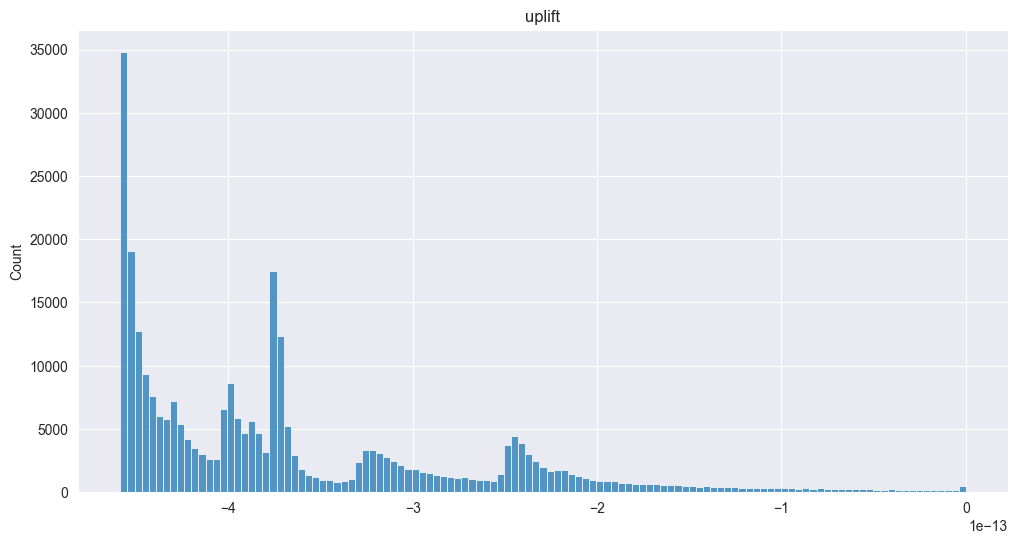

In [116]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data = uplift_pd, x=uplift).set_title('uplift')
plt.show()

In [117]:
uplift

array([-2.14300799e-13, -4.46143122e-13, -3.91298105e-13, ...,
       -3.53661544e-13, -1.99618100e-13, -4.54913884e-13])

In [64]:
CsvUplift = pd.DataFrame({'successful_utilization' : uplift})

In [66]:
CsvUplift.to_csv('/Users/ssd/Downloads/uplift4.csv')

In [65]:
CsvUplift

,successful_utilization
0,-4.554135e-13
1,-3.128053e-13
2,-7.333023e-14
3,-4.507505e-13
4,-4.247713e-13
...,...
74308,-3.619327e-13
74309,-4.066192e-13
74310,-4.076184e-13
74311,-4.521938e-13


In [126]:
CsvUplift2 = pd.concat([X_test, CsvUplift])

In [124]:
X_test = pd.read_csv('test.csv')

In [128]:
CsvUplift2

,application_1,cc_1,cc_2,cc_3,cc_4,feature_1,mb_1,cc_5,cc_6,feature_2,...,feature_24,cc_21,application_15,feature_25,feature_26,cc_22,partner_24,application_16,retro_date,uplift
0,0.0,1.0,NaN,NaN,NaN,0.0,6.0,NaN,NaN,0.0,...,0.0,1.0,0.0,0.0,0.0,-1.2,1.0,0.0,2024-06-18,NaN
1,0.0,1.0,NaN,NaN,NaN,0.0,45.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,1.0,-1.2,1.0,0.0,2024-05-09,NaN
2,0.0,1.0,MB,2.0,Heavy xsell,0.0,13.0,299000.0,PLT,0.0,...,NaN,NaN,0.0,NaN,0.0,-1.2,1.0,0.0,2024-05-30,NaN
3,0.0,1.0,Representatives,123.0,SIM,1.0,158.0,140000.0,PLT,0.0,...,0.0,NaN,0.0,1.0,0.0,-1.2,1.0,0.0,2024-05-27,NaN
4,0.0,1.0,Representatives,123.0,Первичная ДК,0.0,36.0,170000.0,PLT,0.0,...,0.0,0.0,0.0,1.0,0.0,-1.2,1.0,0.0,2024-06-08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.407585e-13
297246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.923217e-13
297247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.536615e-13
297248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.996181e-13


In [133]:
CsvUplift

,successful_utilization
0,-2.143008e-13
1,-4.461431e-13
2,-3.912981e-13
3,-1.696143e-13
4,-2.365053e-13
...,...
297245,-4.407585e-13
297246,-2.923217e-13
297247,-3.536615e-13
297248,-1.996181e-13


In [26]:
test

,application_1,cc_1,cc_2,cc_3,cc_4,feature_1,mb_1,cc_5,cc_6,feature_2,...,bki_46,feature_24,cc_21,application_15,feature_25,feature_26,cc_22,partner_24,application_16,retro_date
0,0.0,1.0,NaN,NaN,NaN,0,6.0,NaN,NaN,0.0,...,373942.00,0.0,1.0,0,0.0,0.0,-1.2,1.0,0,2024-06-18
1,0.0,1.0,NaN,NaN,NaN,0,45.0,NaN,NaN,0.0,...,0.00,0.0,0.0,0,0.0,1.0,-1.2,1.0,0,2024-05-09
2,0.0,1.0,MB,2.0,Heavy xsell,0,13.0,299000.0,PLT,0.0,...,9724333.00,NaN,NaN,0,NaN,0.0,-1.2,1.0,0,2024-05-30
3,0.0,1.0,Representatives,123.0,SIM,1,158.0,140000.0,PLT,0.0,...,0.00,0.0,NaN,0,1.0,0.0,-1.2,1.0,0,2024-05-27
4,0.0,1.0,Representatives,123.0,Первичная ДК,0,36.0,170000.0,PLT,0.0,...,2237284.00,0.0,0.0,0,1.0,0.0,-1.2,1.0,0,2024-06-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74308,NaN,1.0,Representatives,123.0,Multitask,1,NaN,15000.0,PLT,0.0,...,2834099.00,0.0,NaN,0,1.0,0.0,-1.2,1.0,0,2024-05-15
74309,0.0,1.0,Representatives,123.0,Первичная ДК,1,12.0,95000.0,PLT,0.0,...,145886.00,NaN,NaN,0,NaN,0.0,-1.2,1.0,0,2024-07-10
74310,0.0,NaN,PreApprove (Mobile Applicants),2.0,Other,0,5.0,15000.0,PLT,0.0,...,5896358.00,0.0,0.0,1,0.0,1.0,-1.2,1.0,1,2024-06-27
74311,0.0,1.0,Representatives,123.0,Перевыпуск ДК,1,52.0,70000.0,PLT,0.0,...,5339.00,0.0,NaN,0,1.0,0.0,-1.2,1.0,0,2024-06-10


In [68]:
X

,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,feature_2,cc_7,cc_8,application_2,...,application_15,feature_25,feature_26,cc_22,partner_24,application_16,cc_4_OrdinalEncoder,cc_2_OrdinalEncoder,cc_6_OrdinalEncoder,treatment
0,2.397794,1.0,123.0,1.0,14.00000,147000.0,0.0,0.008663,0.008663,2.371477,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,68.0,8.0,7.0,1.0
1,48.861725,1.0,43.0,0.0,1.00000,120000.0,0.0,0.022936,0.022936,4.706499,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,1.0,5.0,7.0,1.0
2,0.000000,1.0,2.0,0.0,30.43861,15000.0,0.0,0.062026,0.060423,0.000000,...,0.0,0.160424,0.0,-1.2,1.000000,0.0,54.0,9.0,7.0,1.0
3,0.000000,1.0,2.0,0.0,91.00000,260000.0,0.0,0.062026,0.060423,0.000000,...,0.0,0.160424,1.0,-1.2,1.000000,0.0,20.0,2.0,7.0,1.0
4,0.000000,1.0,123.0,1.0,1.00000,130000.0,0.0,0.029764,0.029764,0.000000,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,68.0,8.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297245,2.397794,1.0,123.0,1.0,34.00000,95000.0,0.0,0.086722,0.086722,2.371477,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,68.0,8.0,7.0,1.0
297246,2.397794,1.0,123.0,1.0,1.00000,83000.0,0.0,0.025878,0.025878,2.371477,...,0.0,1.000000,0.0,-1.2,0.988519,0.0,68.0,8.0,7.0,1.0
297247,0.000000,1.0,2.0,0.0,2.00000,170000.0,0.0,0.029534,0.045196,0.000000,...,0.0,0.206521,0.0,1.0,1.000000,0.0,36.0,4.0,7.0,1.0
297248,0.000000,1.0,123.0,1.0,5.00000,15000.0,0.0,0.034553,0.034553,0.000000,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,68.0,8.0,7.0,1.0


In [69]:
bd

,application_1,cc_1,cc_2,cc_3,cc_4,feature_1,mb_1,cc_5,cc_6,feature_2,...,feature_26,cc_22,partner_24,application_16,retro_date,successful_utilization,treatment,cc_4_OrdinalEncoder,cc_2_OrdinalEncoder,cc_6_OrdinalEncoder
0,NaN,1.0,Representatives,123.0,Первичная ДК,1,14.0,147000.0,PLT,0.0,...,0.0,-1.2,1.0,0,2024-07-04,0,1,68.0,8.0,7.0
1,NaN,1.0,Offline,43.0,Airports,0,1.0,120000.0,PLT,0.0,...,0.0,-1.2,1.0,0,2024-06-06,0,1,1.0,5.0,7.0
2,0.0,1.0,Web,2.0,seo,0,NaN,15000.0,PLT,0.0,...,0.0,-1.2,1.0,0,2024-07-21,1,1,54.0,9.0,7.0
3,0.0,1.0,MB,2.0,One Click Offer,0,91.0,260000.0,PLT,0.0,...,1.0,-1.2,1.0,0,2024-05-23,0,1,20.0,2.0,7.0
4,0.0,1.0,Representatives,123.0,Первичная ДК,1,1.0,130000.0,PLT,0.0,...,0.0,-1.2,1.0,0,2024-06-28,0,1,68.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297245,NaN,1.0,Representatives,123.0,Первичная ДК,1,34.0,95000.0,PLT,0.0,...,0.0,-1.2,1.0,0,2024-05-13,1,1,68.0,8.0,7.0
297246,NaN,1.0,Representatives,123.0,Первичная ДК,1,1.0,83000.0,PLT,0.0,...,0.0,-1.2,NaN,0,2024-07-08,0,1,68.0,8.0,7.0
297247,0.0,1.0,Mobile Warm,2.0,TOOS cor clients,0,2.0,170000.0,PLT,0.0,...,0.0,1.0,1.0,0,2024-06-12,0,1,36.0,4.0,7.0
297248,0.0,1.0,Representatives,123.0,Первичная ДК,1,5.0,15000.0,PLT,0.0,...,0.0,-1.2,1.0,0,2024-06-02,1,1,68.0,8.0,7.0


In [70]:
bd['application_1'].value_counts()

application_1
 0.000000        171119
-12499.875000         7
-16666.500000         5
-11111.000000         5
-8333.250000          5
                  ...  
 1242.428571          1
 709.000000           1
 8971.797500          1
 957.352857           1
 6537.000000          1
Name: count, Length: 10630, dtype: int64

In [71]:
bd[bd['application_1'] != 0]

,application_1,cc_1,cc_2,cc_3,cc_4,feature_1,mb_1,cc_5,cc_6,feature_2,...,feature_26,cc_22,partner_24,application_16,retro_date,successful_utilization,treatment,cc_4_OrdinalEncoder,cc_2_OrdinalEncoder,cc_6_OrdinalEncoder
0,NaN,1.0,Representatives,123.0,Первичная ДК,1,14.0,147000.0,PLT,0.0,...,0.0,-1.2,1.0,0,2024-07-04,0,1,68.0,8.0,7.0
1,NaN,1.0,Offline,43.0,Airports,0,1.0,120000.0,PLT,0.0,...,0.0,-1.2,1.0,0,2024-06-06,0,1,1.0,5.0,7.0
6,NaN,1.0,Representatives,123.0,Первичная ДК,1,14.0,15000.0,PLT,0.0,...,0.0,-1.2,1.0,0,2024-06-29,0,0,68.0,8.0,7.0
7,NaN,1.0,Representatives,123.0,Перевыпуск ДК,1,31.0,15000.0,PLT,0.0,...,0.0,-1.2,1.0,0,2024-06-06,0,1,69.0,8.0,7.0
8,NaN,1.0,Representatives,2.0,Multitask,1,13.0,15000.0,PLT,0.0,...,0.0,-1.2,1.0,0,2024-07-21,0,1,19.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297241,NaN,1.0,Representatives,123.0,Первичная ДК,1,19.0,130000.0,PLT,0.0,...,0.0,-1.2,NaN,0,2024-06-20,1,1,68.0,8.0,7.0
297242,NaN,1.0,Representatives,123.0,Первичная ДК,1,4.0,37000.0,PLT,0.0,...,0.0,-1.2,NaN,0,2024-06-19,0,1,68.0,8.0,7.0
297243,NaN,1.0,MB,2.0,Heavy,0,4.0,96000.0,PLT,0.0,...,0.0,-1.2,1.0,0,2024-05-01,0,0,9.0,2.0,7.0
297245,NaN,1.0,Representatives,123.0,Первичная ДК,1,34.0,95000.0,PLT,0.0,...,0.0,-1.2,1.0,0,2024-05-13,1,1,68.0,8.0,7.0


,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,feature_2,cc_7,cc_8,application_2,...,application_15,feature_25,feature_26,cc_22,partner_24,application_16,cc_4_OrdinalEncoder,cc_2_OrdinalEncoder,cc_6_OrdinalEncoder,treatment
0,2.397794,1.0,123.0,1.0,14.00000,147000.0,0.0,0.008663,0.008663,2.371477,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,68.0,8.0,7.0,1.0
1,48.861725,1.0,43.0,0.0,1.00000,120000.0,0.0,0.022936,0.022936,4.706499,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,1.0,5.0,7.0,1.0
2,0.000000,1.0,2.0,0.0,30.43861,15000.0,0.0,0.062026,0.060423,0.000000,...,0.0,0.160424,0.0,-1.2,1.000000,0.0,54.0,9.0,7.0,1.0
3,0.000000,1.0,2.0,0.0,91.00000,260000.0,0.0,0.062026,0.060423,0.000000,...,0.0,0.160424,1.0,-1.2,1.000000,0.0,20.0,2.0,7.0,1.0
4,0.000000,1.0,123.0,1.0,1.00000,130000.0,0.0,0.029764,0.029764,0.000000,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,68.0,8.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297245,2.397794,1.0,123.0,1.0,34.00000,95000.0,0.0,0.086722,0.086722,2.371477,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,68.0,8.0,7.0,1.0
297246,2.397794,1.0,123.0,1.0,1.00000,83000.0,0.0,0.025878,0.025878,2.371477,...,0.0,1.000000,0.0,-1.2,0.988519,0.0,68.0,8.0,7.0,1.0
297247,0.000000,1.0,2.0,0.0,2.00000,170000.0,0.0,0.029534,0.045196,0.000000,...,0.0,0.206521,0.0,1.0,1.000000,0.0,36.0,4.0,7.0,1.0
297248,0.000000,1.0,123.0,1.0,5.00000,15000.0,0.0,0.034553,0.034553,0.000000,...,0.0,1.000000,0.0,-1.2,1.000000,0.0,68.0,8.0,7.0,1.0


In [73]:
df

,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,feature_2,cc_7,cc_8,application_2,...,feature_26,cc_22,partner_24,application_16,retro_date,successful_utilization,treatment,cc_4_OrdinalEncoder,cc_2_OrdinalEncoder,cc_6_OrdinalEncoder
0,NaN,1.0,123.0,1,14.0,147000.0,0.0,0.008663,0.008663,NaN,...,0.0,-1.2,1.0,0,2024-07-04,0,1,68.0,8.0,7.0
1,NaN,1.0,43.0,0,1.0,120000.0,0.0,0.022936,0.022936,NaN,...,0.0,-1.2,1.0,0,2024-06-06,0,1,1.0,5.0,7.0
2,0.0,1.0,2.0,0,NaN,15000.0,0.0,NaN,NaN,0.0,...,0.0,-1.2,1.0,0,2024-07-21,1,1,54.0,9.0,7.0
3,0.0,1.0,2.0,0,91.0,260000.0,0.0,NaN,NaN,0.0,...,1.0,-1.2,1.0,0,2024-05-23,0,1,20.0,2.0,7.0
4,0.0,1.0,123.0,1,1.0,130000.0,0.0,0.029764,0.029764,0.0,...,0.0,-1.2,1.0,0,2024-06-28,0,1,68.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297245,NaN,1.0,123.0,1,34.0,95000.0,0.0,0.086722,0.086722,NaN,...,0.0,-1.2,1.0,0,2024-05-13,1,1,68.0,8.0,7.0
297246,NaN,1.0,123.0,1,1.0,83000.0,0.0,0.025878,0.025878,NaN,...,0.0,-1.2,NaN,0,2024-07-08,0,1,68.0,8.0,7.0
297247,0.0,1.0,2.0,0,2.0,170000.0,0.0,NaN,NaN,0.0,...,0.0,1.0,1.0,0,2024-06-12,0,1,36.0,4.0,7.0
297248,0.0,1.0,123.0,1,5.0,15000.0,0.0,0.034553,0.034553,0.0,...,0.0,-1.2,1.0,0,2024-06-02,1,1,68.0,8.0,7.0


In [74]:
df[df['cc_4_OrdinalEncoder'].isna()]

,application_1,cc_1,cc_3,feature_1,mb_1,cc_5,feature_2,cc_7,cc_8,application_2,...,feature_26,cc_22,partner_24,application_16,retro_date,successful_utilization,treatment,cc_4_OrdinalEncoder,cc_2_OrdinalEncoder,cc_6_OrdinalEncoder
47,0.0,1.0,NaN,0,30.0,NaN,0.0,0.039375,NaN,0.0,...,0.0,-1.2,1.0,0,2024-05-24,0,1,NaN,NaN,NaN
134,0.0,1.0,NaN,0,5.0,NaN,0.0,0.012390,NaN,0.0,...,0.0,-1.2,1.0,0,2024-05-02,0,1,NaN,NaN,NaN
144,NaN,1.0,NaN,0,73.0,NaN,0.0,0.016245,NaN,NaN,...,1.0,-1.2,1.0,0,2024-06-08,0,1,NaN,NaN,NaN
155,0.0,1.0,NaN,0,NaN,NaN,0.0,NaN,NaN,0.0,...,0.0,-1.2,1.0,0,2024-06-12,0,1,NaN,NaN,NaN
178,0.0,1.0,NaN,0,3.0,NaN,0.0,0.016347,NaN,0.0,...,0.0,-1.2,1.0,0,2024-05-14,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296926,NaN,1.0,NaN,0,NaN,NaN,0.0,0.015969,NaN,NaN,...,0.0,-1.2,1.0,0,2024-05-04,0,1,NaN,NaN,NaN
296932,0.0,1.0,NaN,0,NaN,NaN,0.0,0.029107,NaN,0.0,...,0.0,1.0,1.0,0,2024-06-04,0,1,NaN,NaN,NaN
297103,0.0,1.0,NaN,0,9.0,NaN,0.0,0.005088,NaN,0.0,...,0.0,-1.2,1.0,0,2024-06-04,0,1,NaN,NaN,NaN
297128,NaN,1.0,NaN,0,9.0,NaN,0.0,0.011881,NaN,NaN,...,0.0,2.0,1.0,0,2024-06-12,0,1,NaN,NaN,NaN
